In [51]:
import numpy as np
import matplotlib.pyplot as plt
import collections

%matplotlib inline

In [52]:
filename = "raw_data_cleaned.txt"
_file = open(filename, "r+")
cap_data = collections.OrderedDict()

line_num = 1
sample_sum = 0
baseline = 0

for line in _file:
    if (line_num-1) % 6 == 0 or line_num == 1: #it's a tuple
        
        #save previous sample points
        if sample_sum != 0:
            data_point = sample_sum/5
            if saturation == 0:
                baseline = data_point
            data_point = data_point - baseline
            cap_data[capacity][-1].append(data_point)
            sample_sum = 0
        
        #get new capacity and saturation
        capacity = int(line.split(',')[0]) 
        saturation = int(line.split(',')[1])
        
        #add data to the dict
        if capacity not in cap_data:
            cap_data[capacity] = [[0]]
        else:
            cap_data[capacity].append([saturation])
        
    else: #it's a sample
        
        sample_sum += float(line)
    
    line_num += 1

#add data from the last samples corersponding to the laste tuple
data_point = sample_sum/5
cap_data[capacity][-1].append(data_point)

In [53]:
print(cap_data[100])

[[0, 0.0], [10, 0.28114943504400003], [20, 0.8157834529880001], [30, 0.8981910705600002], [40, 1.0690412998240002], [50, 1.0708678722419998], [60, 1.304953622819999], [70, 1.600779867174], [80, 1.8602238655100005], [90, 2.437754058842], [100, 5.719052410128]]


In [54]:
plot_data = collections.OrderedDict()

for capacity in cap_data:
    plot_data[capacity] = [[], []]
    for pair in cap_data[capacity]:
        plot_data[capacity][0].append(pair[0])
        plot_data[capacity][1].append(pair[1])

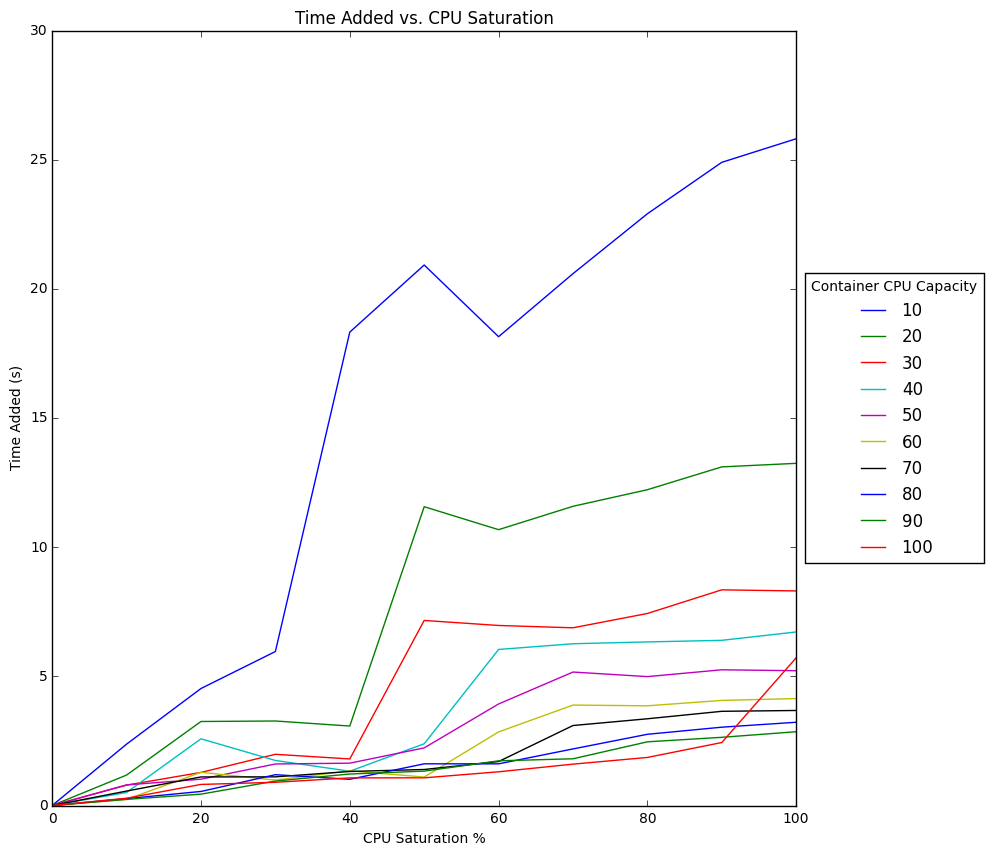

In [64]:
cp = plt.figure(figsize=(12,10))
cap_plot = cp.add_subplot(111)

for capacity in plot_data:
    cap_plot.plot(plot_data[capacity][0],plot_data[capacity][1], label = str(capacity))
    
#configure details for the plot
cap_plot.set_title("Time Added vs. CPU Saturation")
cap_plot.set_xlabel("CPU Saturation %")
cap_plot.set_ylabel("Time Added (s)")
box = cap_plot.get_position()
cap_plot.set_position([box.x0, box.y0, box.width * 0.8, box.height])
cap_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Container CPU Capacity")
plt.show()
cp.savefig("cpu_graph.png")